In [1]:
import pandas as pd
import requests
import json
import plotly.express as px
import shapely.geometry
import numpy as np
# !pip install --upgrade nbformat
# !pip uninstall plotly
# !pip install --upgrade plotly

In [2]:
res= requests.get("https://data.calgary.ca/resource/wwf6-cpsg.json")
json_data = json.loads(res.text)
json_data[0]

{'multilinestring': {'coordinates': [[[-114.06036700906716, 51.04831941917631],
    [-114.05790835100508, 51.04824965329041]]],
  'type': 'MultiLineString'},
 'secname': '5AVS12',
 'shape_leng': '172.5702739',
 'volume': '22000',
 'year': '2018'}

In [7]:
for i in json_data[:1]:
    for k,v in i['multilinestring'].items():
        lats = []
        lons = []
        if type(v) == list:
            for e in v[0]:
                lats = np.append(lats, e[1])
                lons = np.append(lons, e[0])
                lats = np.append(lats, None)
                lons = np.append(lons, None)
                # long.append(e[0])
                # lat.append(e[1])
                # print(e)
            print(lats)
            print(lons)
            fig = px.line_geo(lat=lats, lon=lons)
            fig.update_geos(fitbounds="locations")
            fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
            fig.show()
        # break
    # break

[51.04831941917631 None 51.04824965329041 None]
[-114.06036700906716 None -114.05790835100508 None]


In [ ]:
df = pd.read_csv("Traffic_Volumes_for_2018.csv")

In [ ]:
df.head()

,YEAR,SECNAME,Shape_Leng,VOLUME,multilinestring
0,2018,5AVS12,172.570274,22000,MULTILINESTRING ((-114.06036700906716 51.04831...
1,2018,94AVSEWBON,189.451491,5000,MULTILINESTRING ((-114.06876825342002 50.96863...
2,2018,12STNE29,261.453939,5000,MULTILINESTRING ((-114.03372206187294 51.05323...
3,2018,100AVNE1,804.353006,2000,MULTILINESTRING ((-114.01318801277267 51.14336...
4,2018,106AVSE1,507.320869,14000,MULTILINESTRING ((-113.98128756128924 50.95784...


In [ ]:
for i in df['multilinestring']:
    x,y = i.xy

AttributeError: ignored

In [1]:
# !pip install geopandas
# !pip install osmnx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly.express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)


In [14]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "drive":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

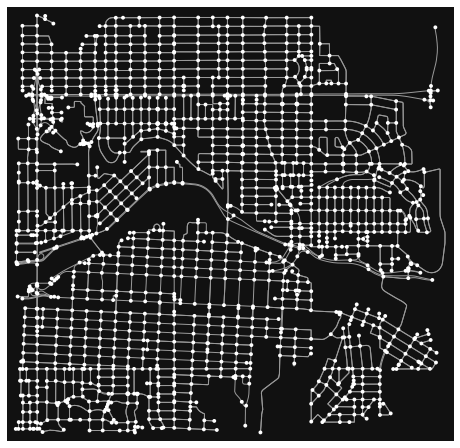

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
G = create_graph("Calgary", 2500, "drive")
ox.plot_graph(G)

TypeError: ignored

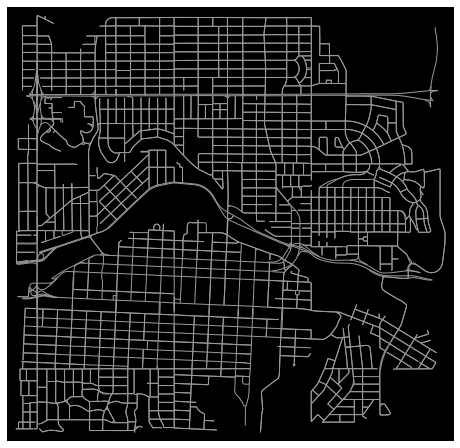

In [19]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (51.04831941917631, 51.04824965329041)
end = (-114.06036700906716, -114.05790835100508)
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)

start1 = (51.04834941917631, 51.04824955329041)
end1 = (-114.06056700906716, -114.05794535100508)
start_node1 = ox.get_nearest_node(G, start1)
end_node1 = ox.get_nearest_node(G, end1)




# Calculate the shortest path
route1 = nx.shortest_path(G, start_node, end_node, weight='travel_time')
route2 = nx.shortest_path(G, start_node1, end_node1, weight='travel_time')
#Plot the route and street networks

rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

ox.plot_graph_route(G, [route1,route2], route_linewidth=6, node_size=0, bgcolor='k',route_color="green");
# ox.plot_graph_route(G, route1, route_linewidth=6, node_size=0, bgcolor='k',route_color="red");
ox.show

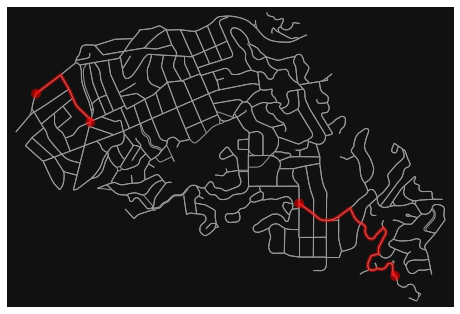

In [21]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)

G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')

# pick 4 random nodes as origins/destinations for the 2 routes
orig1 = list(G.nodes())[0]
dest1 = list(G.nodes())[-1]
orig2 = list(G.nodes())[50]
dest2 = list(G.nodes())[-50]

# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(G, orig1, dest1, weight='length')
route2 = nx.shortest_path(G, orig2, dest2, weight='length')

# create route colors
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, node_size=0)

In [41]:
df = pd.read_csv("Traffic_Signals.csv")

In [42]:
import plotly.graph_objects as go
df

,INSTDATE,FIRSTROAD,SECONDROAD,QUADRANT,INT_TYPE,PEDBUTTONS,PED_TIMER,ACCESSIBLE_PEDESTRIAN_SIGNAL,latitude,longitude,Point,Count,avg_wait_time(min),number of vahicals
0,10/7/1982,72 AVENUE,BARLOW TRAIL,SE,Traffic signal,Yes,No,No,50.989494,-113.981839,POINT (-113.98183929046724 50.98949386995173),1.0,3.0,3.0
1,7/18/1988,76 AVENUE,BARLOW TRAIL,SE,Traffic signal T intersection,Yes,No,No,50.985107,-113.981813,POINT (-113.98181251750049 50.98510683265409),1.0,6.0,5.0
2,1/1/1985,90 AVENUE,JERUSALEM ROAD/16 STREET,SW,Traffic signal,Yes,Yes,Yes,50.972228,-114.100447,POINT (-114.1004465975376 50.97222813076117),1.0,10.0,9.0
3,8/11/1994,COUNTRY HILLS BOULEVARD,SUPERSTORE ENTRANCE,NW,Traffic signal T intersection,Yes,No,No,51.138748,-114.160118,POINT (-114.16011766147173 51.13874847563491),1.0,1.0,4.0
4,7/31/2003,14 AVENUE,44 STREET,SE,Traffic signal,Yes,No,No,51.040937,-113.970001,POINT (-113.97000115944223 51.040936995365165),1.0,0.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = df['longitude'],
#         lat = df['latitude'],
#         text = df['INT_TYPE'],
#         mode = 'markers',
#         # marker_color = df['cnt'],
#         ))

# fig.update_layout(
#         # title = 'Most trafficked US airports<br>(Hover for airport names)',
#         # geo_scope='',
#     )
# fig.show()




fig = go.Figure(go.Scattermapbox(
        lat=df['latitude'].values,
        lon=df['longitude'].values,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text = df["FIRSTROAD"].astype(str) + "<br>Avg waiting time : " + df["avg_wait_time(min)"].astype(str) + "<br>Number of vahicles : " + df['number of vahicals'].astype(str),
    
        # text=texts
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken="pk.eyJ1IjoidmlzaHZlc2g1NCIsImEiOiJja2w1Yjd3aHoxemJ5MnZ1aXJueXg1emwzIn0.4GLa2MsiSTG-D9spCasbRw",
        bearing=0,
        # center=dict(
        #     lat=38.92,
        #     lon=-77.07
        # ),
        pitch=0,
        zoom=10
    ),
)
fig.show()